# Predict the Sale Price of a Property

### W207 Final Project
#### Surya Gutta, Ian Anderson, Allison Godfrey, and Jackie Ma

### 1. Problem Statement

We will be using machine learning approaches to try to most accurately predict home price based on relevant features. The goal of this notebook is to fully understand the data, extract the most relevant features, and apply different machine learning models with various regularization strengths to assess the accuracies, evaluate and compare the errors, and choose the best model accordingly. 

The components of our notebook are as follows: 
1. Problem Statement
2. Exploratory Data Analysis 
3. Data Cleaning 
4. Feature Engineering
5. Encoding Categorical Features
6. Outlier Analysis
7. Machine Learning Models and Assessment

https://www.kaggle.com/c/house-prices-advanced-regression-techniques  
 

### 2. Exploratory Data Analysis (EDA)

In [184]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
import xgboost as xgb
#Set default matplotlib style to seaborn
mpl.style.use('seaborn-darkgrid')
base_color='#436BAD'
red_color='#990000'
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from vecstack import stacking
from sklearn.model_selection import train_test_split


In [125]:
np.random.seed(0)
# Load Data
pd.options.display.width=None
pd.options.display.max_columns = None
#Train data
train = pd.read_csv('./house-prices-data/train.csv',index_col=0)

#Test data
test = pd.read_csv('./house-prices-data/test.csv',index_col=0)

In [126]:
# Train data size
print(train.shape)

(1460, 80)


In [127]:
#Sample Train data
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [129]:
# Test data size
print(test.shape)

(1459, 79)


In [10]:
#Sample Test data
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### 2.1 Missing Values            

              Count  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageType       81     5.55
GarageYrBlt      81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
GarageCond       81     5.55
BsmtExposure     38     2.60
BsmtFinType2     38     2.60
BsmtFinType1     37     2.53
BsmtCond         37     2.53
BsmtQual         37     2.53
MasVnrArea        8     0.55
MasVnrType        8     0.55
Electrical        1     0.07


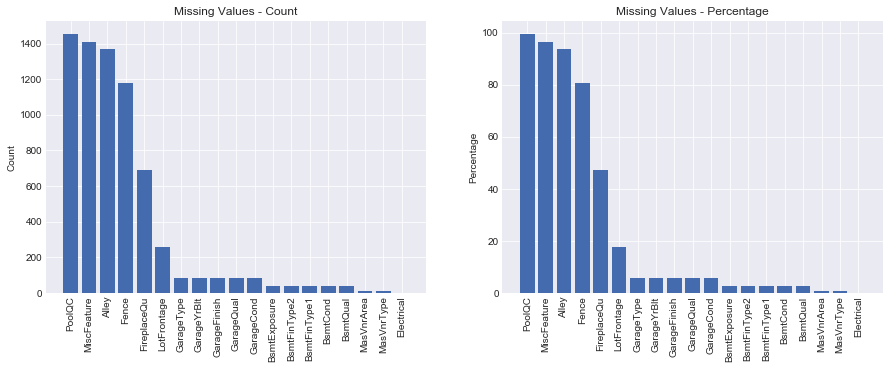

In [11]:
# Analyze on missing data
# Missing values
def missing_values(data):
    train_missing = data.isnull().sum()
    train_missing = pd.DataFrame(train_missing[train_missing > 0])
    train_missing.columns = ['Count']
    train_missing.sort_values(by='Count', ascending = False, inplace=True)
    train_missing['Percent'] = round((train_missing['Count'] /  len(train.index))* 100, 2) 
    plt.figure(figsize=(15, 5))   
    plt.subplot(1,2, 1)
    print(train_missing)
    plt.bar(train_missing.index,train_missing['Count'],color=base_color)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Missing Values - Count')
    plt.subplot(1,2, 2)
    plt.bar(train_missing.index,train_missing['Percent'],color=base_color)
    plt.xticks(rotation=90)
    plt.ylabel('Percentage')
    plt.title('Missing Values - Percentage')

missing_values(train)

In [14]:
def fill_missing_values(df):
    # This function fills missing values with median for numeric columns and most frequent value for categorical columns'''
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    for column in list(missing.index):
        if df[column].dtype == 'object':
            df[column].fillna(df[column].value_counts().index[0], inplace=True)
        elif df[column].dtype == 'int64' or 'float64' or 'int16' or 'float16':
            df[column].fillna(df[column].median(), inplace=True)

In [26]:
fill_missing_values(train)
train.isnull().sum().max()

0

              Count  Percent
PoolQC         1456    99.73
MiscFeature    1408    96.44
Alley          1352    92.60
Fence          1169    80.07
FireplaceQu     730    50.00
LotFrontage     227    15.55
GarageCond       78     5.34
GarageYrBlt      78     5.34
GarageQual       78     5.34
GarageFinish     78     5.34
GarageType       76     5.21
BsmtCond         45     3.08
BsmtExposure     44     3.01
BsmtQual         44     3.01
BsmtFinType1     42     2.88
BsmtFinType2     42     2.88
MasVnrType       16     1.10
MasVnrArea       15     1.03
MSZoning          4     0.27
BsmtFullBath      2     0.14
BsmtHalfBath      2     0.14
Functional        2     0.14
Utilities         2     0.14
GarageCars        1     0.07
GarageArea        1     0.07
TotalBsmtSF       1     0.07
KitchenQual       1     0.07
BsmtUnfSF         1     0.07
BsmtFinSF2        1     0.07
BsmtFinSF1        1     0.07
Exterior2nd       1     0.07
Exterior1st       1     0.07
SaleType          1     0.07


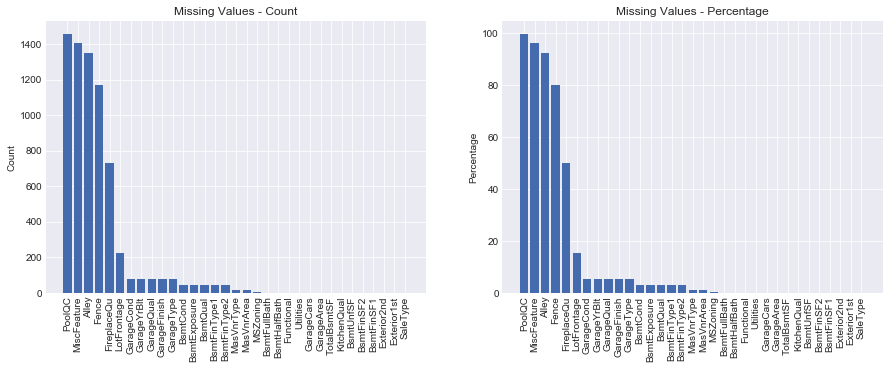

In [28]:
missing_values(test)

In [132]:
fill_missing_values(test)
test.isnull().sum().max()

0

In [133]:
test.shape

(1459, 79)

### Alternate encoding method: Using Label Encoder

In [138]:
def cat_to_num(df):
    # This function changes categorical columns into numeric using Label Encoder
    # Find the categorical columns and the index of each column
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # use label encoder to encode the categorical columns as numeric     
    label_enc = LabelEncoder()
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])

In [141]:
# Impute the missing values
cat_to_num(train_data)
cat_to_num(test)
print("Train Dtype counts: \n{}".format(train.dtypes.value_counts()))
print("Test Dtype counts: \n{}".format(test.dtypes.value_counts()))

Train Dtype counts: 
object     41
int64      36
float64     3
dtype: int64
Test Dtype counts: 
int64      68
float64    11
dtype: int64


In [142]:
test.shape

(1459, 79)

### We know that the variables most closely correlated with Sale Price are OverallQuality, YearBuilt, and Garage Area. Here, we can visualize them more closely as they relate to Sale Price 

#### Sale Price and YearBuilt

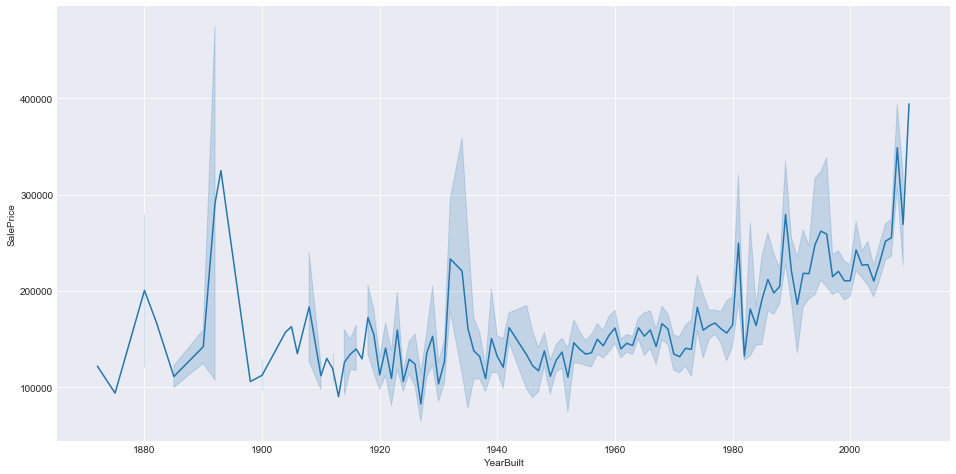

In [39]:
f, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x='YearBuilt', y='SalePrice', data=train)

We can clearly see a dramatic increase in sale price just after 2000, which makes sense with the housing bubble of the time. Also, we can see a lot of variability in sale price between 1880 and 1900. Otherwise, there is a pretty steady positive correlation between sale price and year built. 

#### Sale Price and GarageArea

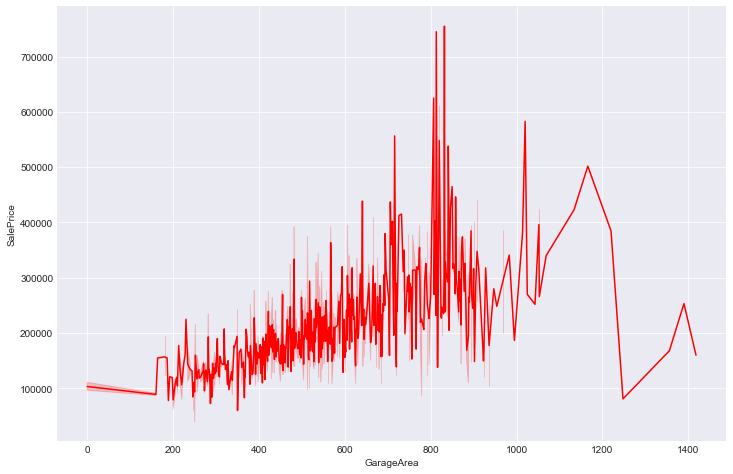

In [41]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='GarageArea', y='SalePrice', color='red',data=train)

We can see a pretty clear positive correlation between the garage area and the sale price of the house, particularly when the garage area does not exceed 1100. After 1100, we see a pretty dramatic drop in sale price. Maybe this signifies a garage lot for an apartment or condo complex? 

#### Sale Price and OverallQual

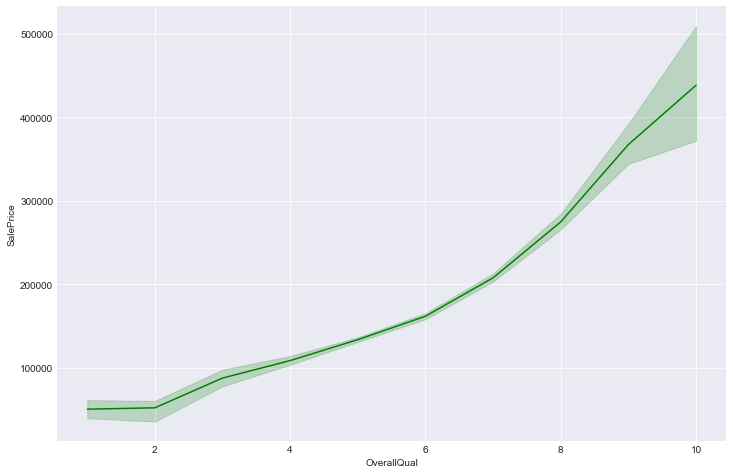

In [40]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='OverallQual', y='SalePrice', color='green',data=train)

As expected, sale price generally increases as the overall quality of a house increases. 

#### Which Sale Type sells for the most? 

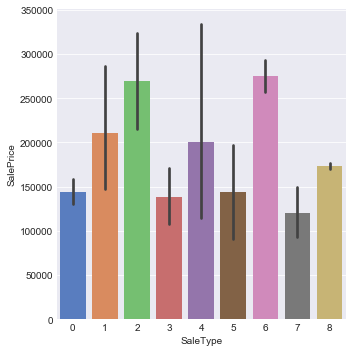

In [42]:
sns.catplot(x='SaleType', y='SalePrice', data=train, kind='bar', palette='muted')

Sale types 2 and 6 have the highest associated sale price. 

We must drop the Sale Price column in order to use train data in ML models:

In [44]:
train_x = train.drop('SalePrice', axis=1)
train_y = np.ravel(np.array(train[['SalePrice']]))
print(train_y.shape)

(1460,)


#### Create Dev Data 

In [186]:
train_data, dev_data, train_labels, dev_labels = train_test_split(train_x, train_y, test_size=0.2)

In [149]:
# train_labels_temp = log_train_labels
# dev_labels_temp = log_dev_labels

#### We will use RMSE as our evaluation metric

In [49]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

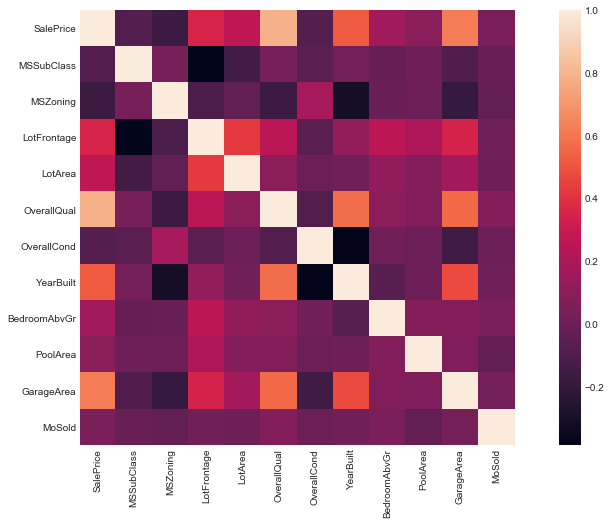

In [181]:
corr_mat = train[["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea", "BldgType",
                       "OverallQual", "OverallCond","YearBuilt", "BedroomAbvGr", "PoolArea", "GarageArea",
                       "SaleType", "MoSold"]].corr()
# corr_mat = train.corr()
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr_mat, vmax=1 , square=True)

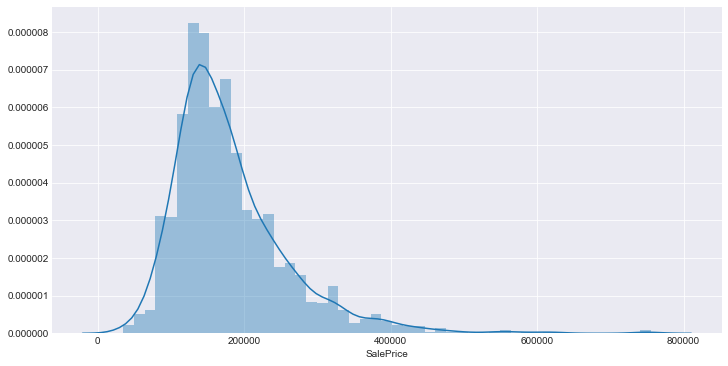

In [182]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(train['SalePrice'])

From the correlation heatmap, we can see that Overall Quality, Year Built, and Garage Area are highly correlated with Sale Price. We can also see in the distribution plot of Sale Price that most houses in the data sent were sold between 100,000 and 200,000. 

# Model Building

In [148]:
# Train data size
print('Train data size:',train_data.shape)

# Dev data size
print('Dev data size:',dev_data.shape)

# Test data size
print('Test data size:',test.shape)

Train data size: (1168, 79)
Dev data size: (292, 79)
Test data size: (1459, 79)


## Regression Models

In [150]:
# build multiple models to preform regression analysis

br_model    = linear_model.BayesianRidge()
ll_model    = linear_model.LassoLars()
ardr_model  = linear_model.ARDRegression()
par_model   = linear_model.PassiveAggressiveRegressor()
trs_model   = linear_model.TheilSenRegressor()
lr_model    = linear_model.LinearRegression()

# Optimum values for Random Forest are arrived after iterating over the following
# n_estimators = [5,10, 25, 50, 75, 100, 150, 200, 250, 300,400,500] 
# max_depth = [4,8,16,32,64]
rfr_model   = RandomForestRegressor(n_estimators=300, max_depth=16)

# Optimum values for XGBRegressor are arrived after iterating over the following
# n_estimators = [10, 25, 50, 75, 100, 200, 250, 300, 400, 500, 750, 1000] 
# learning_rates = [0.001, 0.005, 0.01, 0.02,0.03,0.04,0.05,0.06,0.07, 0.08,0.09,0.1]
xgbr_model = XGBRegressor(base_estimator=br_model, objective ='reg:squarederror',learning_rate=0.05, n_estimators=200)
ada_model  = AdaBoostRegressor(base_estimator=xgbr_model, n_estimators=100, random_state=0, learning_rate=0.5)

In [151]:
# fit models using training data
# br_model_fit   = br_model.fit(train_data, train_labels)
# ll_model_fit   = ll_model.fit(train_data, train_labels)
# ardr_model_fit = ardr_model.fit(train_data, train_labels)
# par_model_fit  = par_model.fit(train_data, train_labels)
# trs_model_fit  = trs_model.fit(train_data, train_labels)
# lr_model_fit   = lr_model.fit(train_data, train_labels)
# rfr_model_fit  = rfr_model.fit(train_data, train_labels)
# xgbr_model_fit = xgbr_model.fit(train_data, train_labels)
# ada_model_fit  = ada_model.fit(train_data, train_labels)

In [153]:
# create a dictionary to store our models with weights to be used for blending
regression_models = [
    {'name': 'AdaBoostRegressor', 'weight': 0.27, 'model': ada_model_fit},
    {'name': 'XGBoost', 'weight': 0.25, 'model': xgbr_model_fit},
    {'name': 'BayesianRidge', 'weight': 0.2, 'model': br_model_fit},    
    {'name': 'Linear', 'weight': 0.11, 'model': lr_model_fit},
    {'name': 'TheilSen', 'weight': 0.15, 'model': trs_model_fit},
    {'name': 'Random Forest', 'weight': 0.01, 'model': rfr_model_fit},    
    {'name': 'ARD', 'weight': 0.01, 'model': ardr_model_fit},
    {'name': 'PassiveAggressive', 'weight': 0.0, 'model': par_model_fit},    
    {'name': 'LassoLars', 'weight': 0.0, 'model': ll_model_fit},
]
regressor_name = []
regressor_rmse = []

for model in regression_models:
    prediction = model['model'].predict(dev_data)
    rmse = np.sqrt(mean_squared_log_error(dev_labels, prediction))
    regressor_name.append(model['name'])
    regressor_rmse.append(rmse)
    print(f'Model = {model["name"]:30} RMSE = {rmse:.9f}')

Model = AdaBoostRegressor              RMSE = 0.136849654
Model = XGBoost                        RMSE = 0.133004054
Model = BayesianRidge                  RMSE = 0.173978369
Model = Linear                         RMSE = 0.175618238
Model = TheilSen                       RMSE = 0.198433650
Model = Random Forest                  RMSE = 0.155108651
Model = ARD                            RMSE = 0.167824723
Model = PassiveAggressive              RMSE = 0.240011928
Model = LassoLars                      RMSE = 0.174647946


### Random Forest

In [187]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=1200,
                                      max_depth=15,
                                      min_samples_split=5,
                                      min_samples_leaf=5,
                                      max_features=None,
                                      random_state=42,
                                      oob_score=True
                                     )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(rf, train_data, train_labels, cv=kf, n_jobs=-1)
y_pred.mean()

0.8390273480601899

In [188]:
rf_model_fit = rf.fit(train_data, train_labels)

In [89]:
# y_pred = rf.predict(dev_data)

In [90]:
# rmse = np.sqrt(mean_squared_log_error(dev_labels, y_pred))
# print("Random Forest RMSE: ", rmse)

Random Forest RMSE:  0.15880755634809607


### XG Boost (alone)

In [189]:
xg_boost = XGBRegressor( learning_rate=0.01,
                         n_estimators=6000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7,
                         colsample_bytree=0.2,
                         objective='reg:linear', nthread=-1,
                         scale_pos_weight=1, seed=27,
                         reg_alpha=0.00006
                       )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(xg_boost, train_data, train_labels, cv=kf, n_jobs=-1)
y_pred.mean()

0.8798065268101753

In [190]:
xg_boost_fit = xg_boost.fit(train_data, train_labels)

[14:22:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# xgb_pred = xg_boost.predict(dev_data)

In [91]:
# rmse = np.sqrt(mean_squared_log_error(dev_labels, xgb_pred))
# print("XG Boost RMSE: ", rmse)

XG Boost RMSE:  0.12278924198042673


### Linear Regressor Model 

In [191]:
lr_model = linear_model.LinearRegression()
kf = KFold(n_splits=5)
y_pred = cross_val_score(lr_model, train_data, train_labels, cv=kf, n_jobs=-1)
y_pred.mean()

0.44050574370870244

In [192]:
lr_model_fit = lr_model.fit(train_data, train_labels)

In [94]:
# lr_pred = lr_model.predict(dev_data)

In [96]:
# rmse = np.sqrt(mean_squared_log_error(dev_labels, lr_pred))
# print("XG Boost RMSE: ", rmse)

XG Boost RMSE:  0.17561823772885435


### AdaBoost Regressor 

In [193]:
ada_model  = AdaBoostRegressor(base_estimator=xgbr_model, n_estimators=100, random_state=0, learning_rate=0.5)

kf = KFold(n_splits=5)
y_pred = cross_val_score(ada_model, train_data, train_labels, cv=kf, n_jobs=-1)
y_pred.mean()

0.8643706278112517

In [194]:
ada_model_fit = ada_model.fit(train_data, train_labels)

In [100]:
# ada_pred = ada_model.predict(dev_data)

In [213]:
# rmse = np.sqrt(mean_squared_log_error(dev_labels, ada_pred))
# print("XG Boost RMSE: ", rmse)

### Gradient Boosting

In [214]:
g_boost = GradientBoostingRegressor( n_estimators=6000, learning_rate=0.01,
                                     max_depth=5, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42
                                   )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(g_boost, train_data, train_labels, cv=kf, n_jobs=-1)
y_pred.mean()

0.8785283446175998

In [215]:
g_boost_fit = g_boost.fit(train_data, train_labels)

### Blended Model

In [217]:
regression_models = [
    {'name': 'AdaBoostRegressor', 'weight': 0.05, 'model': ada_model_fit},
    {'name': 'XGBoost', 'weight': 0.6, 'model': xg_boost_fit},
    {'name': 'GBoost', 'weight': 0.35, 'model': g_boost_fit}
#     {'name': 'Linear', 'weight': 0.05, 'model': lr_model_fit},
#     {'name': 'Random Forest', 'weight': 0.05, 'model': rf_model_fit},    
]
regressor_name = []
regressor_rmse = []

for model in regression_models:
    prediction = model['model'].predict(dev_data)
    rmse = np.sqrt(mean_squared_log_error(dev_labels, prediction))
    regressor_name.append(model['name'])
    regressor_rmse.append(rmse)
    print(f'Model = {model["name"]:30} RMSE = {rmse:.9f}')

Model = AdaBoostRegressor              RMSE = 0.115557601
Model = XGBoost                        RMSE = 0.103868690
Model = GBoost                         RMSE = 0.107014939


In [218]:
# run a prediction with blended regression models
def blend_models_predict(data):
    predict = []
    for model in regression_models:
        if len(predict) == 0:
            predict = model['weight'] * model['model'].predict(data)
        else:
            predict += model['weight'] * model['model'].predict(data)
    
    return predict

predict = blend_models_predict(dev_data)

rmse = np.sqrt(mean_squared_log_error(dev_labels, predict))
regressor_name.append('Blended')
regressor_rmse.append(rmse)
print(f'Blended Model RMSE = {rmse:.5f}')

Blended Model RMSE = 0.10370


### Predict Home Prices Using Blended Model

In [219]:
print(test.shape)

(1459, 79)


In [220]:
test_predict = blend_models_predict(test)
# prices = np.exp(test_predict)
submission = pd.DataFrame()

submission['Id'] = np.array(test.index)
submission['SalePrice'] = test_predict

In [222]:
submission.to_csv('submission.csv', index=False)

In [221]:
submission.head()

,Id,SalePrice
0,1461,131744.796875
1,1462,168121.062500
2,1463,192137.000000
3,1464,198593.000000
4,1465,195297.687500


In [179]:
submission.shape

(1459, 2)

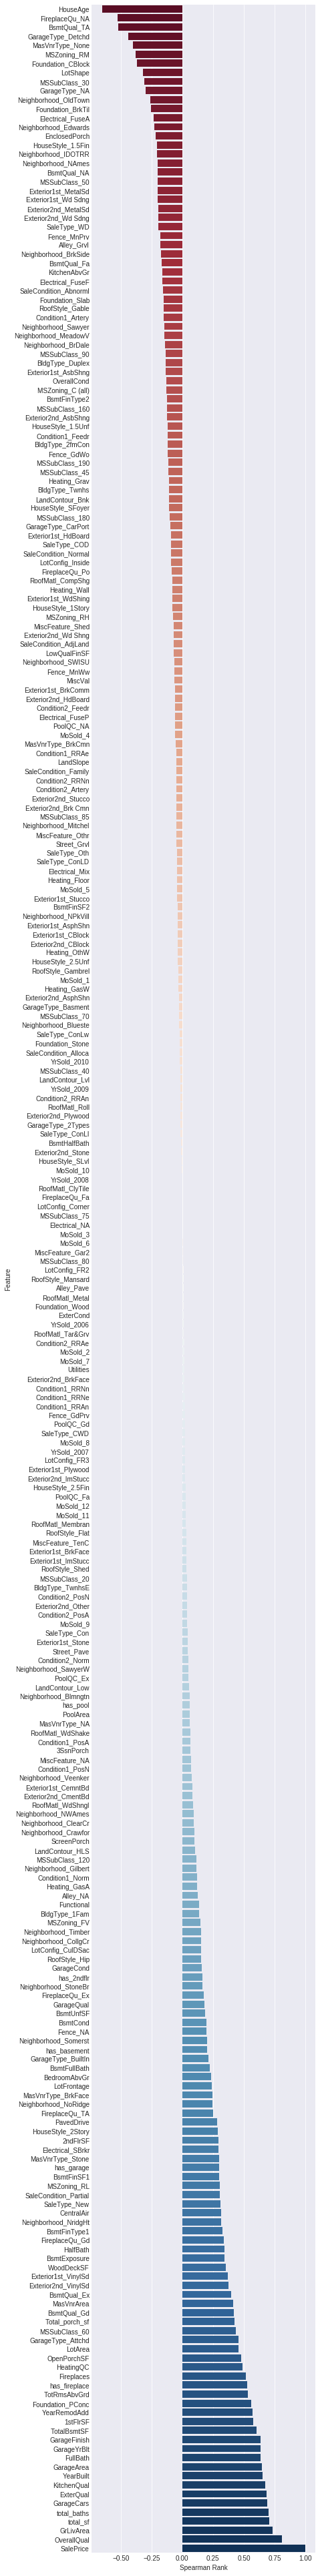

In [16]:
# Spearman's Rank
spearman_rank = pd.DataFrame()
spearman_rank['Feature'] = train_new.columns
spearman_rank['Spearman Rank'] = [train_new[f].corr(train_new['SalePrice'], 'spearman') for f in train_new.columns]
spearman_rank = spearman_rank.sort_values('Spearman Rank')
    
plt.figure(figsize=(6, 0.25*len(train_new.columns)))
sns.barplot(data=spearman_rank, y='Feature', x='Spearman Rank', orient='h', palette="RdBu")

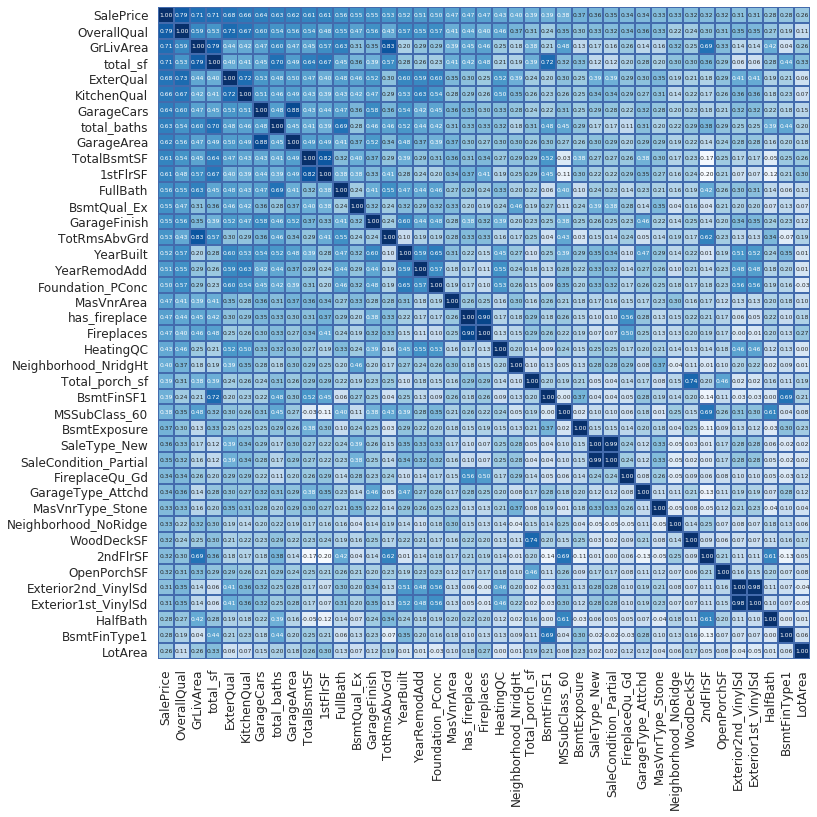

In [17]:
# Heat Map for largest 40 features
corr_matrix = train_new.corr()
high_corr_cols = corr_matrix.nlargest(41, 'SalePrice')['SalePrice'].index # Add 1 as it includes SalePrice
cm = np.corrcoef(train_new[high_corr_cols].values.T)
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm,annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 6}, yticklabels=high_corr_cols.values, 
                 xticklabels=high_corr_cols.values, ax = ax, cmap="Blues", linewidths=1, 
                 linecolor=base_color, cbar=False)
plt.show()

#### 2.3 Distributions

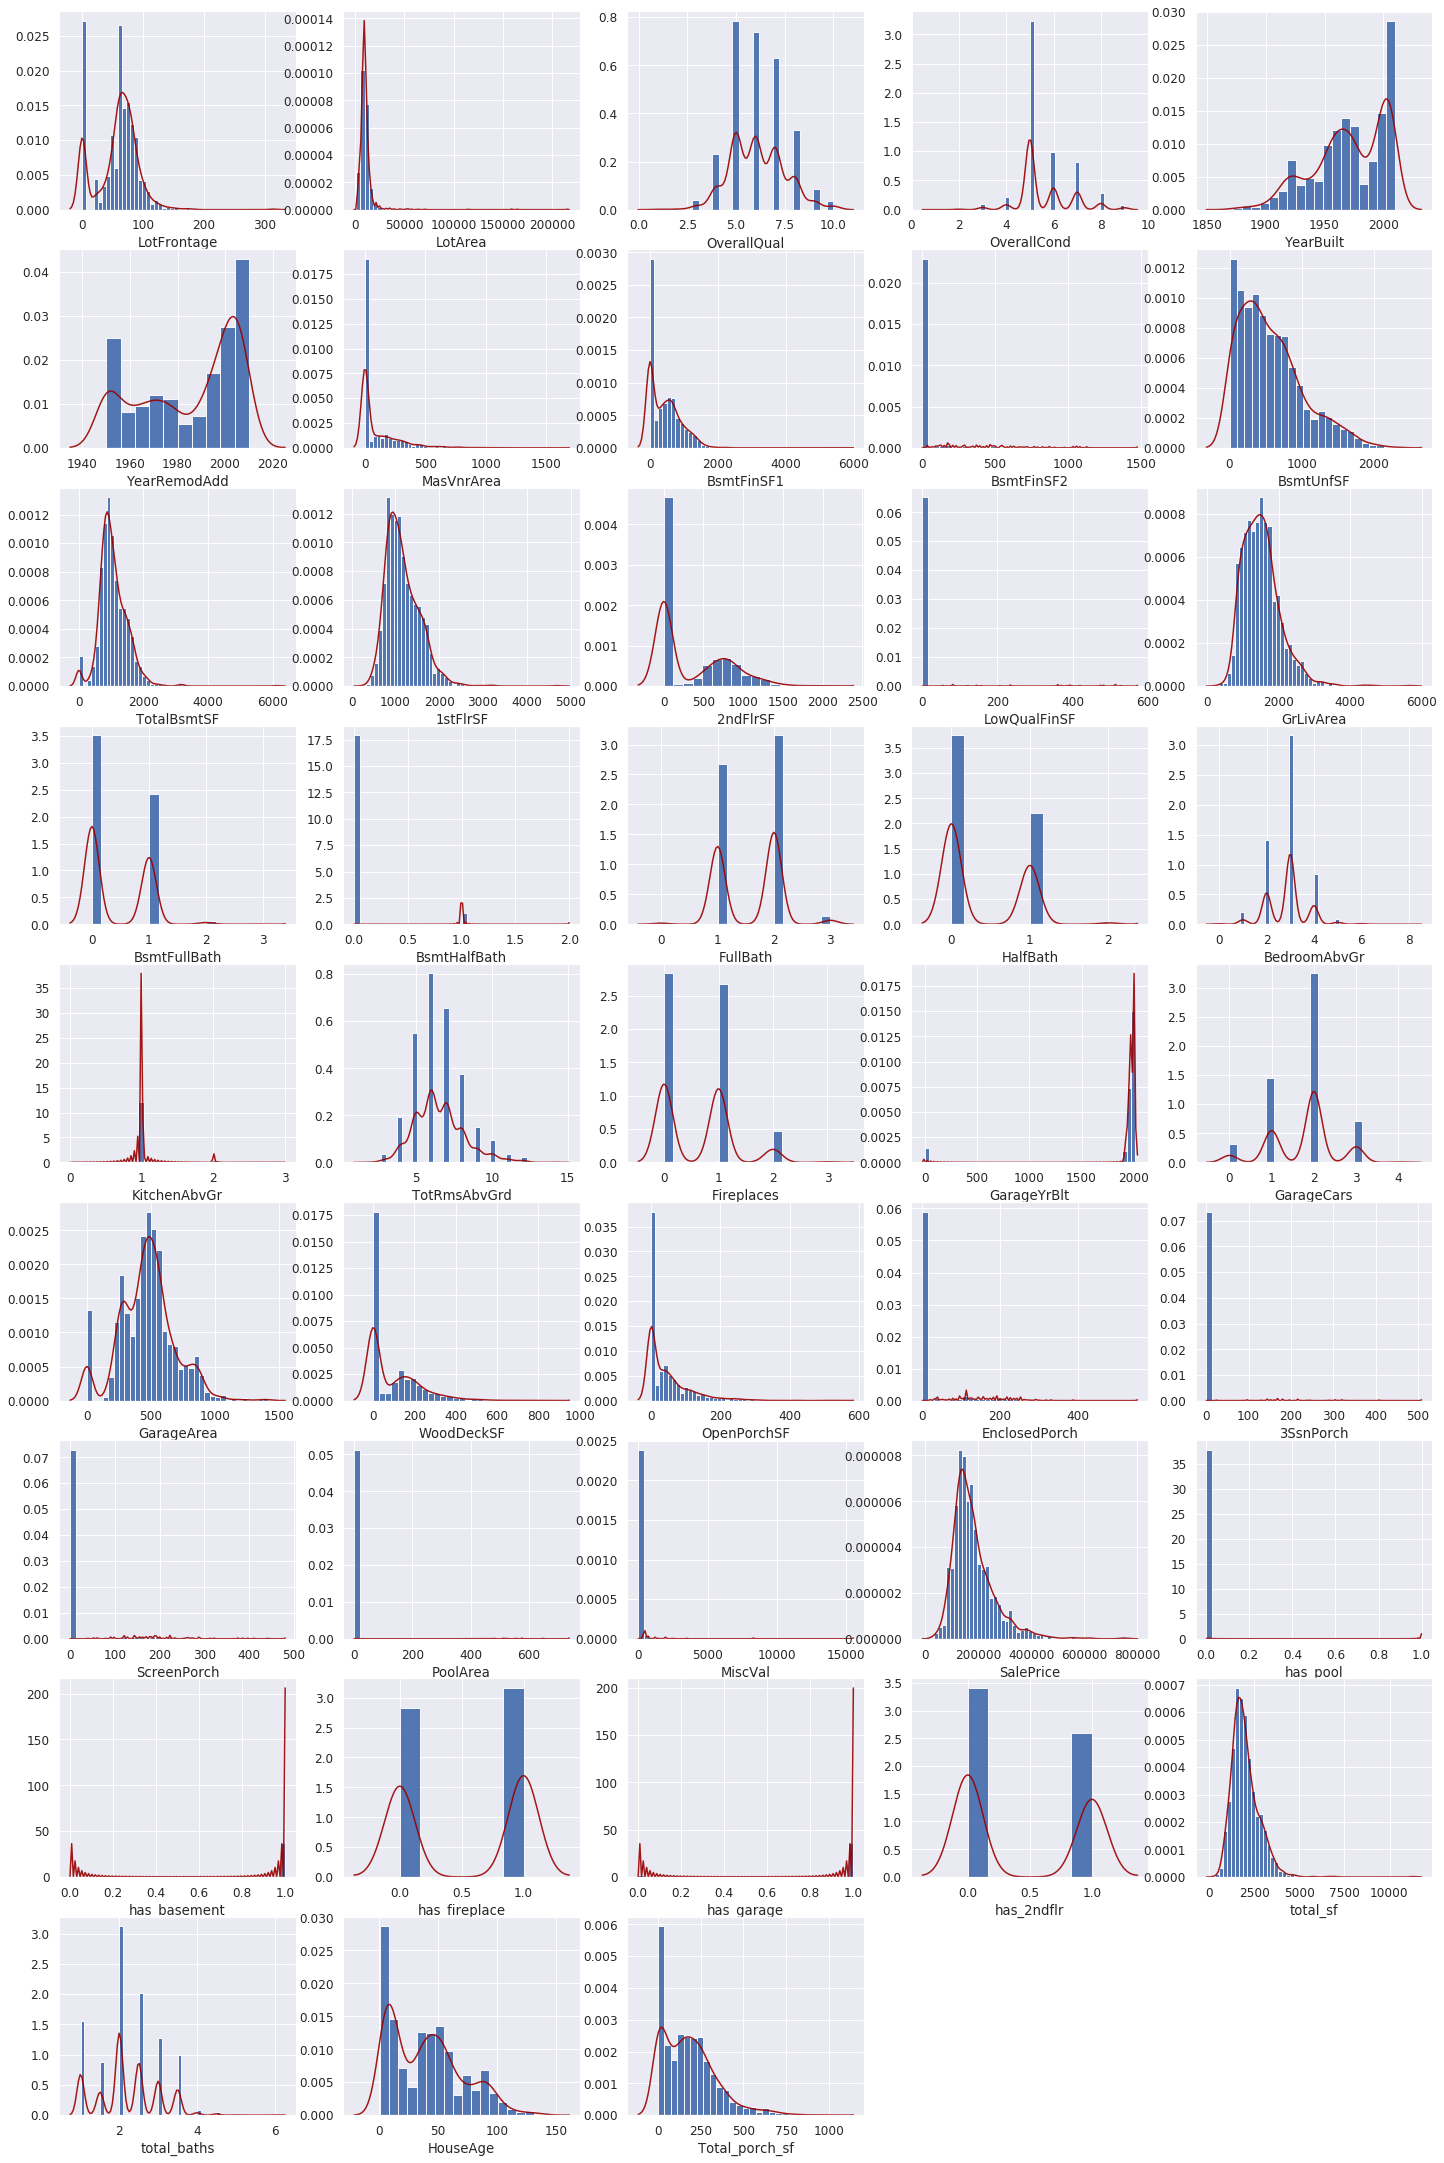

In [20]:
# Show the distribution plots for numerical features.
fig, axes = plt.subplots(figsize=(20,30))
fig.tight_layout()
cell_no = 1
for column_name in numerical_cols.columns:     
    plt.subplot(9, 5, cell_no)
    sns.distplot(numerical_cols[column_name], hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9},label=column_name)
    cell_no+=1

#### 2.4 Analysis on 'Sale Price' (Outcome / Dependent / Target) variable

Text(0.5, 1.0, 'Probability Plot')

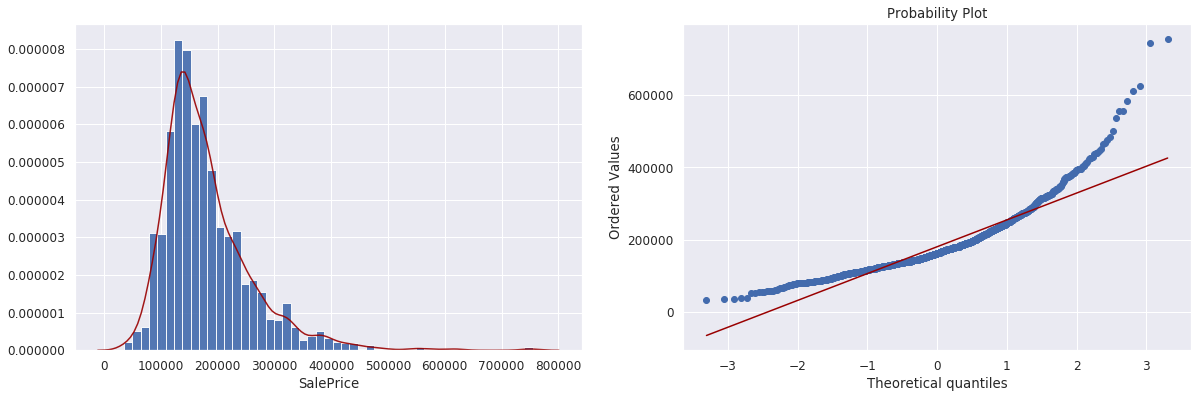

In [21]:
# Plot the Sale Price distribution
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121)
sns.distplot(train_new['SalePrice'], hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9});
ax2 = fig.add_subplot(122)
plt.title("Distribution")
stats.probplot(train['SalePrice'], plot=ax2);
ax2.get_lines()[0].set_color(base_color)
ax2.get_lines()[1].set_color(red_color)
plt.title("Probability Plot")

TODO: Provide analysys on right skewed distribution. 

Text(0.5, 1.0, 'Probability after Log transformation')

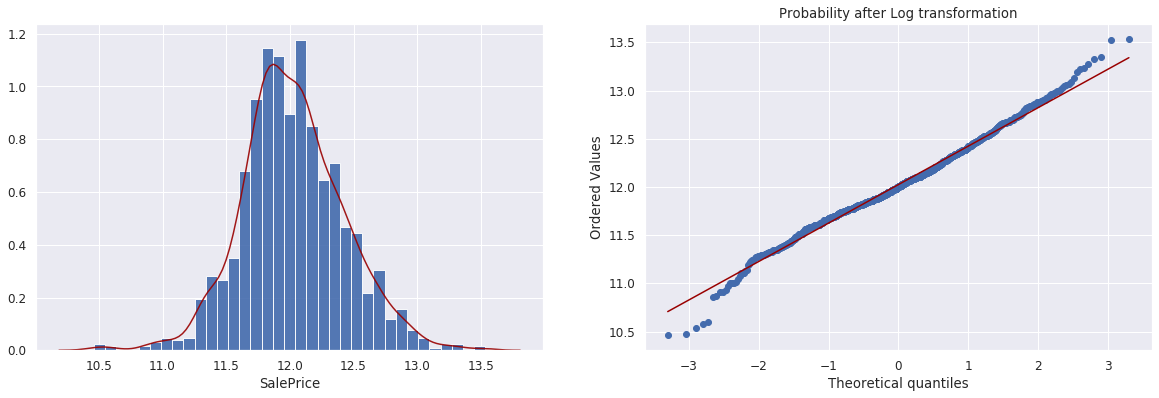

In [22]:
#Apply log transformation to SalePrice Outcome variable
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121)
sns.distplot(np.log(train_new['SalePrice']),   hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9})

ax2 = fig.add_subplot(122)
plt.title("Distribution after Log transformation")
stats.probplot(np.log(train_new['SalePrice']), plot=ax2);
ax2.get_lines()[0].set_color(base_color)
ax2.get_lines()[1].set_color(red_color)
plt.title("Probability after Log transformation")

TODO: Provide analysys on normal distribution after log transformation. 

#### 2.5    Target feature ('Sales Price') and Predictors

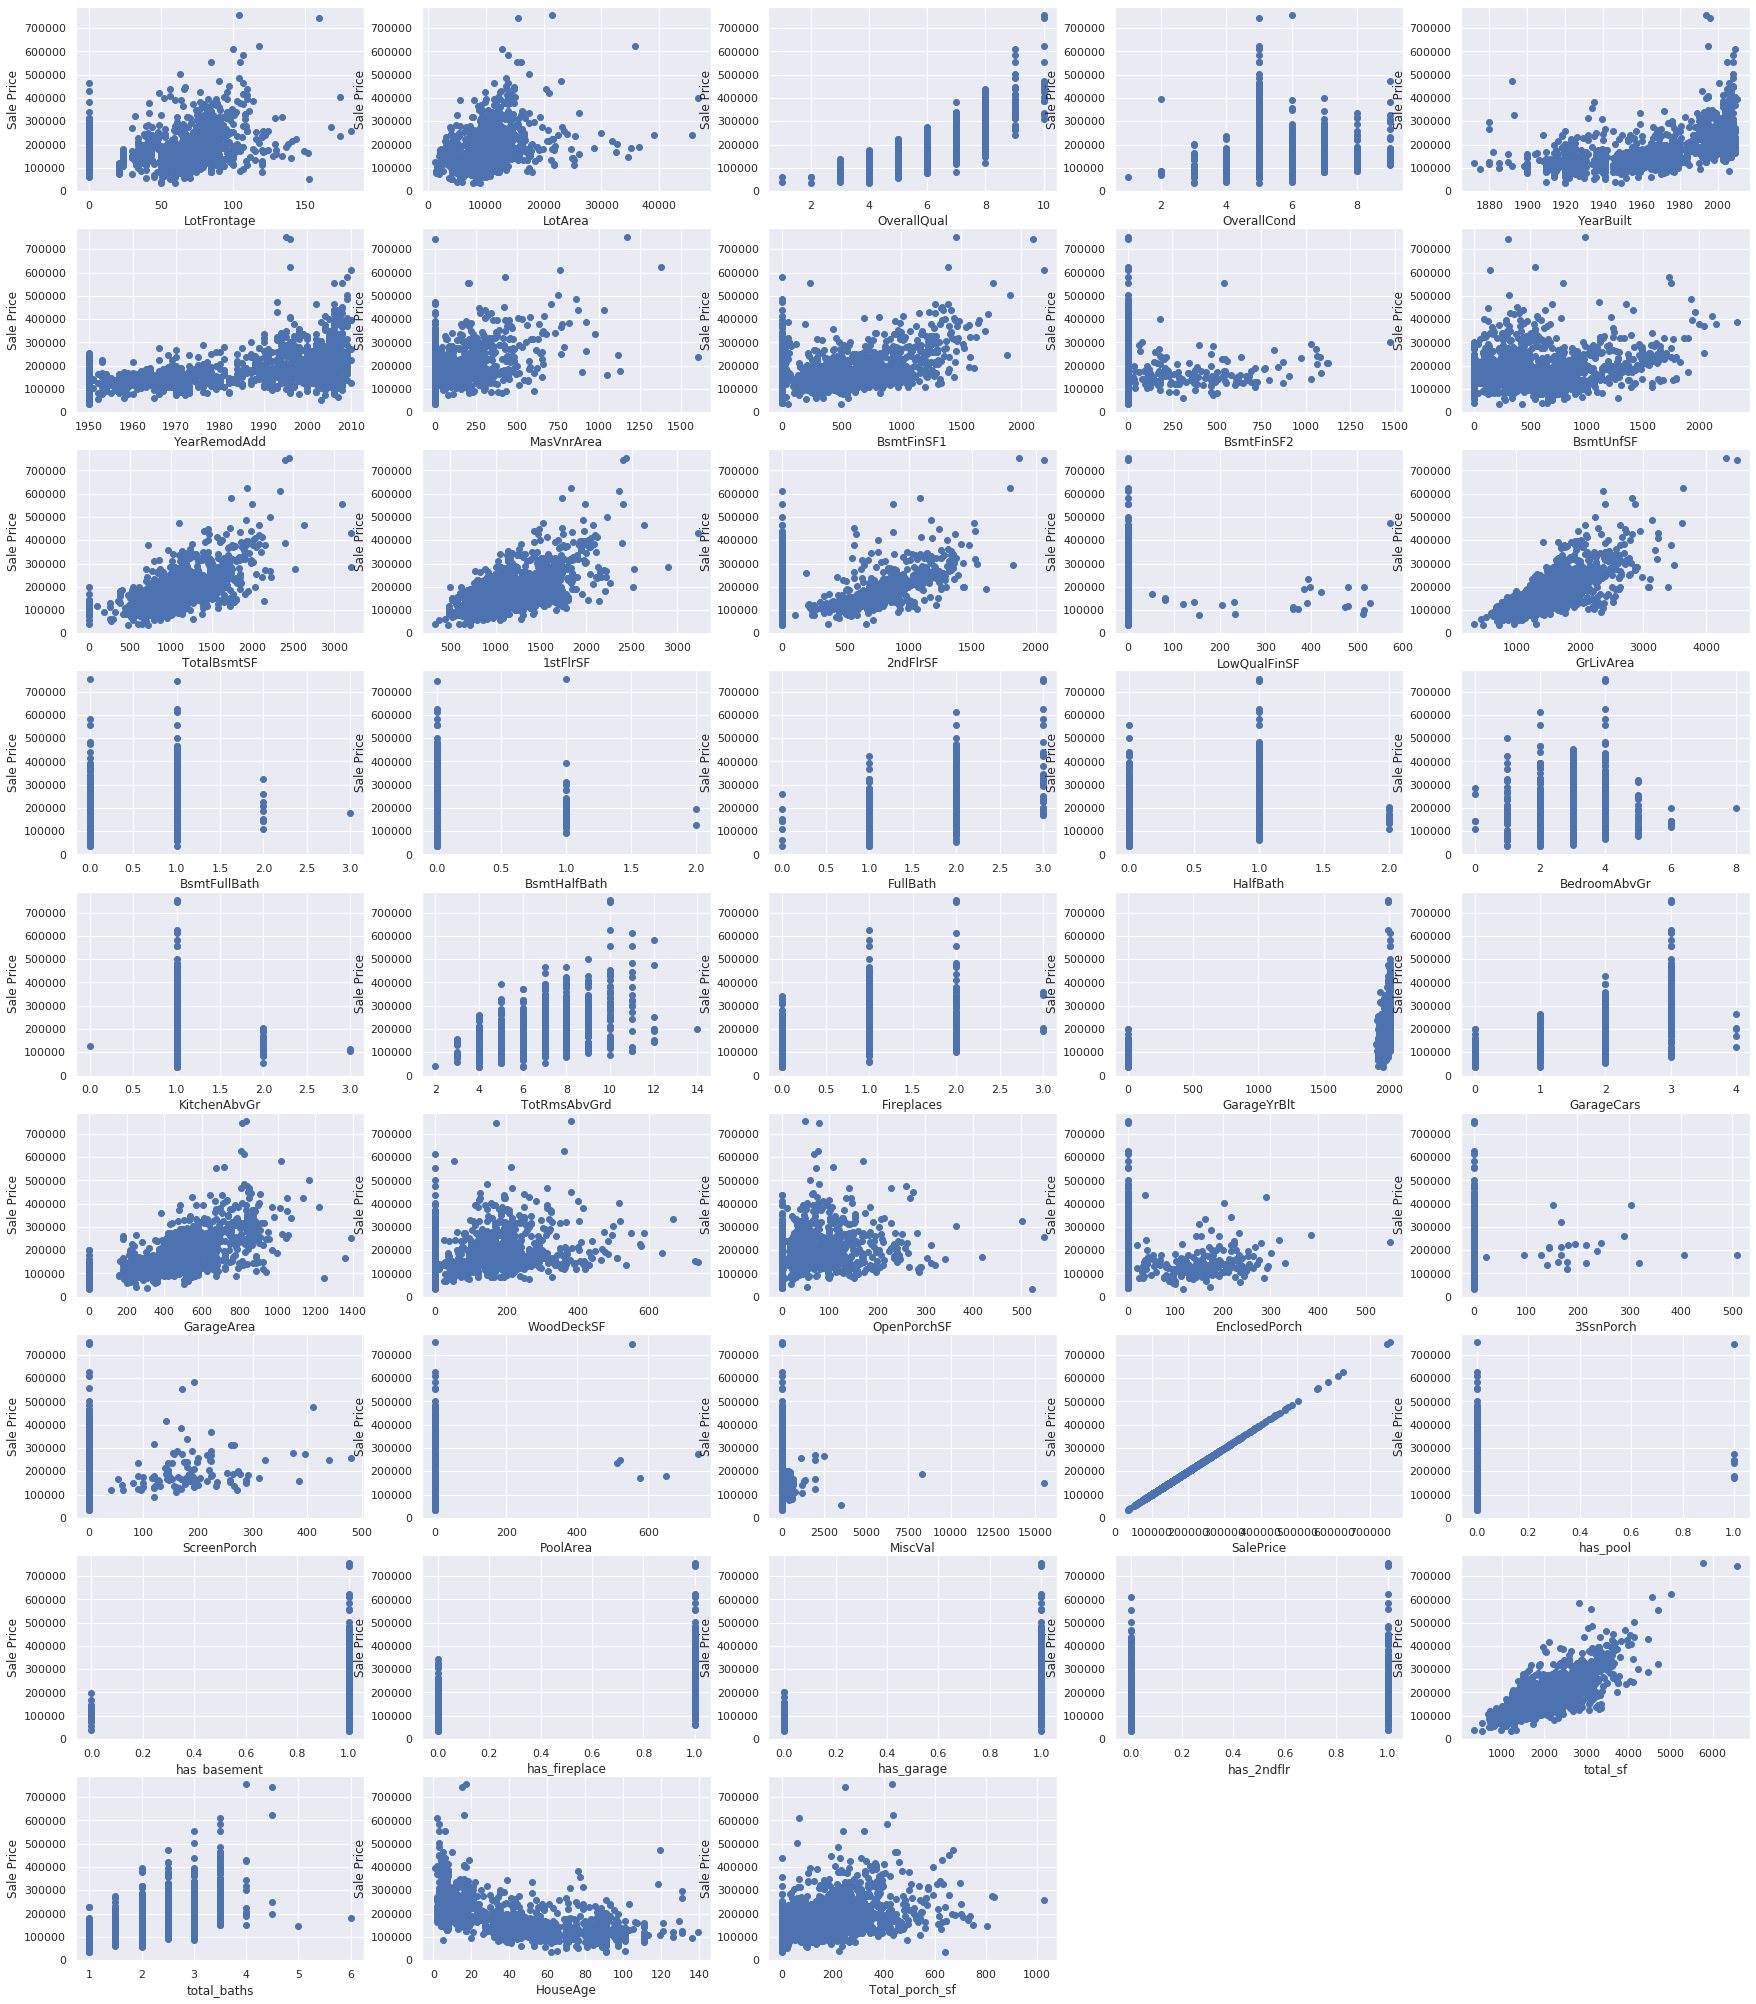

In [38]:
plt.figure(figsize=(30, 40))

n = 1
for col in numerical_cols.columns:  
    scatter = plt.subplot(10, 5, n)
    plt.scatter(train_new[col], train_new["SalePrice"], color = 'b')
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    n+=1
plt.show()